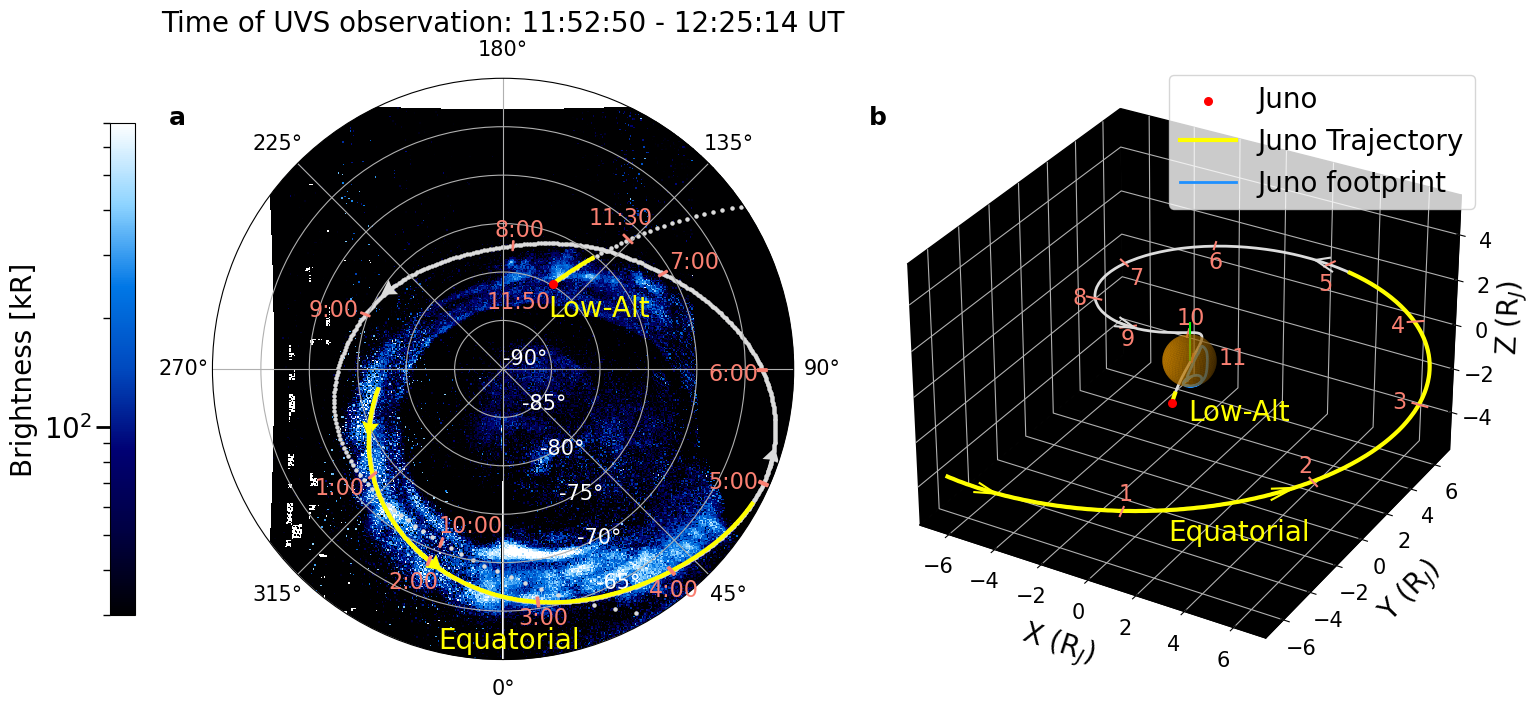

In [1]:
'''Code to produce Figure 1'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle

def degree_formatter(x, pos):
    return f"{int(x)}°"

#get aurora data
lat_data = pd.read_csv('Lat_grid.txt', header=None)
lon_data = pd.read_csv('Lon_grid.txt', header=None)
brightness_data = pd.read_csv('Brightness.txt', header=None)
lat_grid = lat_data.values
lon_grid = lon_data.values
brightness = brightness_data.values
brightness = np.where( brightness == 0 , 1e-10, brightness)
theta = np.deg2rad(lon_grid)
r = lat_grid

#Get juno footprint information
file_path_full = '011222_location_map_all_S.txt'
data_all_map = pd.read_csv(file_path_full, delim_whitespace=True)
data_all_map['Lon_rad'] = np.radians(data_all_map['Lon'])

data_all_map['Time'] = pd.to_datetime(data_all_map['Time'], format='%Y-%m-%d/%H:%M:%S')
specific_time = '2022-01-12 04:49:00'
specific_time_late = '2022-01-12 11:39:00'
index_eq = (data_all_map[data_all_map['Time'] == specific_time].index)[0]
index_late = (data_all_map[data_all_map['Time'] == specific_time_late].index)[0]

data = pd.read_csv('011222_location_actual.txt', delim_whitespace=True) #Juno actual position 
data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d/%H:%M:%S')
data_map = pd.read_csv('011222_location_map_all_S.txt', delim_whitespace=True) #Juno footprint mapped
data_map['Time'] = pd.to_datetime(data_map['Time'], format='%Y-%m-%d/%H:%M:%S')

data.set_index('Time', inplace=True)
aligned_data = data.reindex(data_map['Time']).interpolate(method='time')
aligned_data.reset_index(inplace=True)
R = aligned_data['R']  # Radius (fixed in this dataset)
lat = aligned_data['Lat']
lon = aligned_data['Lon']


specific_time = '2022-01-12 04:49:00'
specific_time_late = '2022-01-12 11:39:00'
index_gen = (aligned_data[aligned_data['Time'] == specific_time].index)[0]
index_gen_late = (aligned_data[aligned_data['Time'] == specific_time_late].index)[0]

R_map = data_map['R']  # Radius (fixed in this dataset)
lat_map = data_map['Lat']
lon_map = data_map['Lon']
lat_rad_map = np.radians(lat_map)
lon_rad_map = np.radians(lon_map)
lat_rad = np.radians(lat)
lon_rad = np.radians(lon)

x = R * np.cos(lat_rad) * np.cos(lon_rad)
y = R * np.cos(lat_rad) * np.sin(lon_rad)
z = R * np.sin(lat_rad)

x_map = R_map * np.cos(lat_rad_map) * np.cos(lon_rad_map)
y_map = R_map * np.cos(lat_rad_map) * np.sin(lon_rad_map)
z_map = R_map * np.sin(lat_rad_map)

aligned_data['x'] = x
aligned_data['y'] = y
aligned_data['z'] = z


'''
Below is a for loop that shows the position of the spacecraft and its footprint at any point in time. 
For the plot below, the last index is chosen, but this can be changed to any previous position 
'''
i = len(data_all_map)-1

fig = plt.figure(figsize=(20, 8)) 
x_start, y_start = 0.45, 0.8  
x_end, y_end = 0.74, 0.51      
x_start2, y_start2 = 0.45, 0.2
x_end2, y_end2 = 0.75, 0.48  

if index_late <= i:
    ax1 = fig.add_subplot(121, polar=True)
    custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "custom", ['#000001', '#000041', '#000073', '#0049bf', '#0077e6', '#8dd3ff', '#ffffff']
    )
    text_color = 'salmon'
    tick_color = text_color
    c = ax1.pcolormesh(theta, r, brightness, shading='nearest', cmap=custom_cmap, norm=LogNorm(vmin=30, vmax=700))
    cbar = fig.colorbar(c, ax=ax1, shrink=0.8, pad=0.1, location='left')   
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.tick_params(length=10, width=2)
    cbar.ax.tick_params(which='minor', length=5, width=1)
    cbar.set_label('Brightness [kR]', fontsize=20)
    ax1.set_title('Time of UVS observation: 11:52:50 - 12:25:14 UT', fontsize=20)
    ax1.scatter(data_all_map['Lon_rad'], data_all_map['Lat'], marker='o', s=5, color='gainsboro', zorder=1)
    ax1.scatter(data_all_map['Lon_rad'][i], data_all_map['Lat'][i], marker='o', s=30, color='red', zorder=3)
    ax1.plot(data_all_map['Lon_rad'][index_late:i], data_all_map['Lat'][index_late:i], color='yellow', linewidth=3, zorder=2)
    ax1.plot(data_all_map['Lon_rad'][0:index_eq], data_all_map['Lat'][0:index_eq], color='yellow', linewidth=3, zorder=2)

    ax1.set_yticks([-90,-85, -80,-75, -70,-65])  
    ax1.yaxis.set_major_formatter(mticker.FuncFormatter(degree_formatter))  
    ax1.tick_params(axis='y', labelsize=15, length=10, width=2, colors='white')

    arrow_points = [
        (data_all_map['Lon_rad'][10], data_all_map['Lat'][10]),
        (data_all_map['Lon_rad'][100], data_all_map['Lat'][100]),
    ]
    arrow_points2 = [
        (data_all_map['Lon_rad'][300], data_all_map['Lat'][300]),
        (data_all_map['Lon_rad'][520], data_all_map['Lat'][520]),
    ]
    arrow_directions = [
        (0.2, 1.7),  # dx, dy for the first arrow
        (0.2, 1.4),  # dx, dy for the second arrow
    ]
    arrow_directions2 = [
        (0.2, -0.02),  # dx, dy for the first arrow
        (0.2, 1.4),  # dx, dy for the second arrow
    ]

    for point, direction in zip(arrow_points, arrow_directions):
        dx, dy = direction
        ax1.quiver(
            point[0], point[1],  # Start point (x, y)
            dx, dy,  # Direction vector (dx, dy)
            angles='xy', scale_units='xy', scale=1,  # Arrow scaling
            color='yellow', linewidth=1.5, width=0.005, headlength=5, headwidth=6
        )
    for point, direction in zip(arrow_points2, arrow_directions2):
        dx, dy = direction
        ax1.quiver(
            point[0], point[1],  # Start point (x, y)
            dx, dy,  # Direction vector (dx, dy)
            angles='xy', scale_units='xy', scale=2,  # Arrow scaling
            color='gainsboro', linewidth=1.5, width=0.005, headlength=5, headwidth=6
        )
        
    data_all_map['Hour'] = data_all_map['Time'].dt.hour
    hourly_indices = data_all_map[data_all_map['Time'].dt.minute == 0].index
    
    tick_indices_extra = data_all_map[data_all_map['Time'].dt.minute==30].index
    tick_1130_idx = tick_indices_extra[-1]
    
    tick_width = 0.01  # Longitude width (adjust as needed)
    tick_height = 1  # Latitude height (adjust as needed)
    for idx in hourly_indices:
        curr_lon = data_all_map.loc[idx, 'Lon_rad']
        curr_lat = data_all_map.loc[idx, 'Lat']
        hour_label = str(data_all_map.loc[idx, 'Hour'])  # Extract the hour as string

        # Create tick mark rectangle
        tick_mark = Rectangle(
            (curr_lon - tick_width / 2, curr_lat - tick_height / 2),  # Bottom-left corner
            tick_width,  # Width (longitude direction)
            tick_height,  # Height (latitude direction)
            color=tick_color,
            zorder=3
        )
        ax1.add_patch(tick_mark)    
    
    extra_lon = data_all_map.loc[tick_1130_idx,['Lon_rad']]
    extra_lat = data_all_map.loc[tick_1130_idx,['Lat']]
    tick_mark_extra = Rectangle((extra_lon - tick_width, extra_lat - tick_height),  # Bottom-left corner
    0.07,0.15,color=tick_color,zorder=3)
    ax1.add_patch(tick_mark_extra)    
    
    ax1.tick_params(axis='y', colors='white')
    ax1.set_ylim(-90, -60)
    ax1.set_theta_offset(-np.pi / 2.0)
    ax1.tick_params(axis='y', labelsize=15, length=10, width=2)  # Radial ticks
    ax1.tick_params(axis='x', labelsize=15, length=10, width=2)
    # Extract the hour from the Time column
    data_all_map['Hour'] = data_all_map['Time'].dt.hour

    # Select specific indices for ticks
    tick_indices = data_all_map[data_all_map['Time'].dt.minute == 0].index  # Select times at the start of each hour
    tick_positions = data_all_map.loc[tick_indices, ['Lon_rad', 'Lat']]  # Longitude (in radians) and Latitude
    tick_labels = data_all_map.loc[tick_indices, 'Hour'].astype(str)  
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.w_xaxis.set_pane_color((0, 0, 0, 1)) 
    ax2.w_yaxis.set_pane_color((0, 0, 0, 1))
    ax2.w_zaxis.set_pane_color((0, 0, 0, 1))
    ax2.scatter(x[i], y[i], z[i], color='red', s=30,label='Juno')
    ax2.plot(x, y, z, color='gainsboro', linewidth=2)
    ax2.plot(x[:index_gen],y[:index_gen],z[:index_gen],label="Juno Trajectory",color='yellow',linewidth=3)
    ax2.plot(x[index_late:i], y[index_late:i], z[index_late:i], color='yellow', linewidth=3)
    ax2.plot(x_map[:i], y_map[:i], z_map[:i], label="Juno footprint", color='dodgerblue', linewidth=2)
    ax2.tick_params(axis='y', labelsize=15, length=10, width=2)  
    ax2.tick_params(axis='x', labelsize=15, length=10, width=2)
    ax2.tick_params(axis='z', labelsize=15, length=10, width=2)  

    u, v = np.mgrid[0:2*np.pi:320j, 0:np.pi:160j]
    sphere_x = np.sin(v) * np.cos(u)
    sphere_y = np.sin(v) * np.sin(u)
    sphere_z = np.cos(v)
    ax2.plot_surface(sphere_x, sphere_y, sphere_z, color='orange', alpha=0.5)
    
    aligned_data['Hour'] = aligned_data['Time'].dt.hour
    hourly_indices_al = aligned_data[aligned_data['Time'].dt.minute == 0].index
    tick_length = 0.25  # Adjust as needed
    for idx in hourly_indices_al:
        curr_x = aligned_data.loc[idx, 'x']
        curr_y = aligned_data.loc[idx, 'y']
        curr_z = aligned_data.loc[idx, 'z']
        direction_x = -curr_x 
        direction_y = -curr_y  
        norm = np.sqrt(direction_x**2 + direction_y**2)  # Normalize direction
        if norm != 0:
            direction_x /= norm
            direction_y /= norm
            
        tick_x_start, tick_x_end = curr_x - direction_x/3, curr_x + direction_x * tick_length
        tick_y_start, tick_y_end = curr_y - direction_y/3, curr_y + direction_y * tick_length
        tick_z_start, tick_z_end = curr_z, curr_z  # Maintain the same Z level

        ax2.plot([tick_x_start, tick_x_end], [tick_y_start, tick_y_end], [tick_z_start, tick_z_end], color=tick_color, linewidth=1.5)

    arrow_x, arrow_y, arrow_z = 0, 0, 0  # Starting point
    arrow_dx, arrow_dy, arrow_dz = 0, 0, 1.7  # Vector components
    ax2.quiver(arrow_x, arrow_y, arrow_z, arrow_dx, arrow_dy, arrow_dz, color='lime', linewidth=1.5, arrow_length_ratio=0.0)
    ax2.quiver(x[10], y[10], z[10], 0.5, 0.5, -0.4, color='yellow', linewidth=1.5, arrow_length_ratio=1)
    ax2.quiver(x[100], y[100], z[100], 0.5, 0.8, 0, color='yellow', linewidth=1.5, arrow_length_ratio=1)
    ax2.quiver(x[300], y[300], z[300], -0.25, 0.125, -0.075, color='gainsboro', linewidth=1.5, arrow_length_ratio=4)
    ax2.quiver(x[520], y[520], z[520], 0.5, 0.5, -0.4, color='gainsboro', linewidth=1.5, arrow_length_ratio=1)

    ax2.set_xlabel('X (R$_J$)',fontsize=20,labelpad=12)
    ax2.set_ylabel('Y (R$_J$)',fontsize=20,labelpad=12)
    ax2.set_zlabel('Z (R$_J$)',fontsize=20,labelpad=4)
    ax2.set_ylim(-7, 7)
    ax2.set_xlim(-7, 7)
    ax2.set_zlim(-5.5,5.5)
    ax2.legend(fontsize=20)
    fig.text(0.335,0.145,'Equatorial',fontsize=20,color='yellow')
    fig.text(0.39,0.56,'Low-Alt',fontsize=20,color='yellow')
    fig.text(0.7,0.28,'Equatorial',fontsize=20,color='yellow')

    fig.text(0.71,0.43,'Low-Alt',fontsize=20,color='yellow')

    fig.text(0.273,0.338,'1:00',color=text_color,fontsize=16)
    fig.text(0.31,0.22,'2:00',color=text_color,fontsize=16) 
    fig.text(0.375,0.175,'3:00',color=text_color,fontsize=16)
    fig.text(0.44,0.21,'4:00',color=text_color,fontsize=16)
    fig.text(0.47,0.345,'5:00',color=text_color,fontsize=16)
    fig.text(0.47,0.48,'6:00',color=text_color,fontsize=16)
    fig.text(0.45,0.62,'7:00',color=text_color,fontsize=16)
    fig.text(0.363,0.66,'8:00',color=text_color,fontsize=16)
    fig.text(0.27,0.56,'9:00',color=text_color,fontsize=16)
    fig.text(0.335,0.29,'10:00',color=text_color,fontsize=16)
    fig.text(0.41,0.675,'11:30',color=text_color,fontsize=16)
    fig.text(0.359,0.57,'11:50',color=text_color,fontsize=16)

    fig.text(0.675,0.33,'1',color=text_color,fontsize=16)
    fig.text(0.765,0.365,'2',color=text_color,fontsize=16)
    fig.text(0.812,0.445,'3',color=text_color,fontsize=16)
    fig.text(0.811,0.54,'4',color=text_color,fontsize=16)
    fig.text(0.775,0.593,'5',color=text_color,fontsize=16)
    fig.text(0.72,0.62,'6',color=text_color,fontsize=16)
    fig.text(0.68,0.6,'7',color=text_color,fontsize=16)
    fig.text(0.652,0.575,'8',color=text_color,fontsize=16)
    fig.text(0.676,0.524,'9',color=text_color,fontsize=16)
    fig.text(0.704,0.55,'10',color=text_color,fontsize=16)
    fig.text(0.725,0.5,'11',color=text_color,fontsize=16)

    ax3 = fig.add_axes([0.78,0.2, 0.1, 0.1]) #made to correct size of figure
    ax3.set_axis_off()
    plt.subplots_adjust(wspace=0)
    
    fig.text(0.2,0.8,'a',color='black',fontsize=18,fontweight='bold')
    fig.text(0.55,0.8,'b',color='black',fontsize=18,fontweight='bold')
plt.show()